## Exploring Neural Networks with fashion MNIST

### Blog post: https://medium.com/p/b0a8214b7b7b

    Introducing the Fashion MNIST dataset
    Comparing neural network depth - 3-NN vs 6-NN
    Improving predictions with epochs
    Visualizing predictions 


In [1]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 
import matplotlib.pyplot as plt 

print (tf.__version__) # 1.12.0

Using TensorFlow backend.


1.10.0


### Loading the fashion MNIST data 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# returns 4 numpy arrays: 2 training sets and 2 test sets
# images: 28x28 arrays, pixel values: 0 to 255
# labels: array of integers: 0 to 9 => class of clothings
# Training set: 60,000 images, Testing set: 10,000 images

# class names are not included, need to create them to plot the images  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Exploring and Visualizing the data

In [10]:
print("train_images:", train_images.shape)
print("test_images:", test_images.shape)

train_images: (60000, 28, 28)
test_images: (10000, 28, 28)


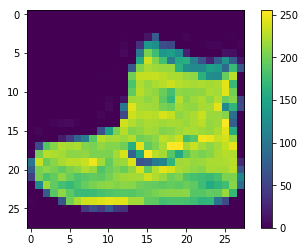

In [4]:
# Visualize the first image from the training dataset
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

### Normalizing the data 

In [5]:
# scale the values to a range of 0 to 1 of both data sets
train_images = train_images / 255.0
test_images = test_images / 255.0

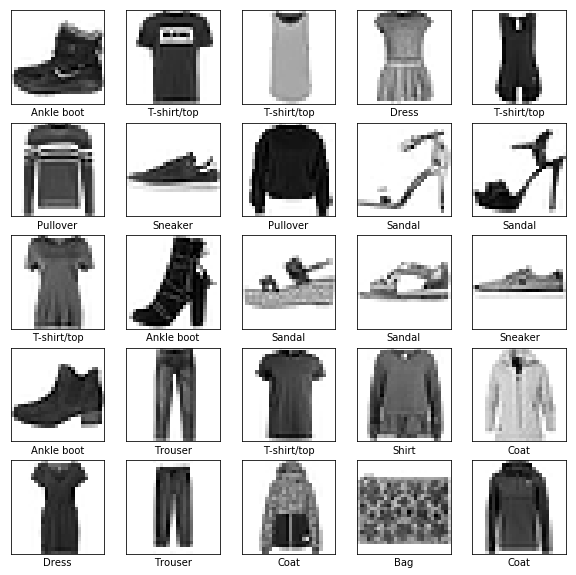

In [6]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])
	

### Training the first NN model 

In [17]:
# Model a simple 3-layer neural network
model_3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_3.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model, specify: optimizer, loss function metrics
model_3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.1748 - acc: 0.9339 - val_loss: 0.3671 - val_acc: 0.8895
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1699 - acc: 0.9376 - val_loss: 0.3429 - val_acc: 0.8957
Epoch 3/10
60000/60000 [==============================] - 8s 129us/step - loss: 0.1652 - acc: 0.9378 - val_loss: 0.3500 - val_acc: 0.8932
Epoch 4/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.1624 - acc: 0.9391 - val_loss: 0.3573 - val_acc: 0.8886
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.1586 - acc: 0.9393 - val_loss: 0.3854 - val_acc: 0.8885
Epoch 6/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1539 - acc: 0.9414 - val_loss: 0.3739 - val_acc: 0.8923
Epoch 7/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1521 - acc: 0.9422 - val_loss: 0.3870 - 

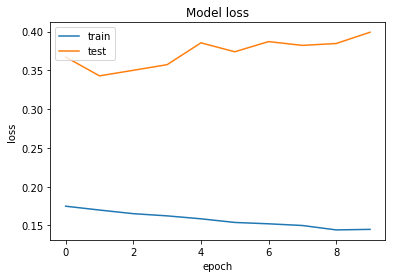

In [42]:
history=model_3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Is deeper more accurate? Comparing network depth

In [35]:
# Model a simple 6-layer neural network 
model_6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_6.summary() 
model_6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_6.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

Epoch 1/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.5002 - acc: 0.8182
Epoch 2/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.3726 - acc: 0.8631
Epoch 3/5
60000/60000 [==============================] - 9s 153us/step - loss: 0.3383 - acc: 0.8756
Epoch 4/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.3175 - acc: 0.8830
Epoch 5/5
10000/10000 [==============================] - 1s 124us/step
Model - 6 layers - test loss: 35.84299396753311
Model - 6 layers - test accuracy: 86.72


### Does increase epochs improve our classification?

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0844 - acc: 0.9682 - val_loss: 0.5299 - val_acc: 0.8870
Epoch 2/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0836 - acc: 0.9690 - val_loss: 0.5417 - val_acc: 0.8873
Epoch 3/20
60000/60000 [==============================] - 7s 112us/step - loss: 0.0800 - acc: 0.9706 - val_loss: 0.5384 - val_acc: 0.8902
Epoch 4/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.0807 - acc: 0.9697 - val_loss: 0.5324 - val_acc: 0.8896
Epoch 5/20
60000/60000 [==============================] - 9s 150us/step - loss: 0.0790 - acc: 0.9707 - val_loss: 0.5271 - val_acc: 0.8919
Epoch 6/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0787 - acc: 0.9708 - val_loss: 0.5403 - val_acc: 0.8900
Epoch 7/20
60000/60000 [==============================] - 7s 117us/step - loss: 0.0777 - acc: 0.9709 - val_loss: 0.5442 - 

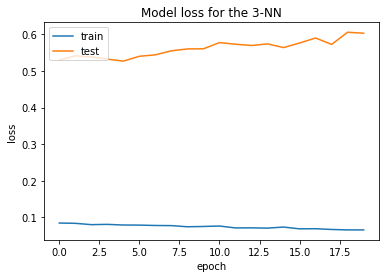

In [47]:
history=model_3.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for the 3-NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.2056 - acc: 0.9213 - val_loss: 0.3646 - val_acc: 0.8853
Epoch 2/20
60000/60000 [==============================] - 9s 149us/step - loss: 0.1964 - acc: 0.9254 - val_loss: 0.3342 - val_acc: 0.8906
Epoch 3/20
60000/60000 [==============================] - 9s 144us/step - loss: 0.1939 - acc: 0.9258 - val_loss: 0.3449 - val_acc: 0.8821
Epoch 4/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1902 - acc: 0.9270 - val_loss: 0.3796 - val_acc: 0.8859
Epoch 5/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.1849 - acc: 0.9294 - val_loss: 0.3599 - val_acc: 0.8927
Epoch 6/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.1843 - acc: 0.9306 - val_loss: 0.3744 - val_acc: 0.8929
Epoch 7/20
60000/60000 [==============================] - 9s 157us/step - loss: 0.1743 - acc: 0.9326 - val_loss: 0.3722 - 

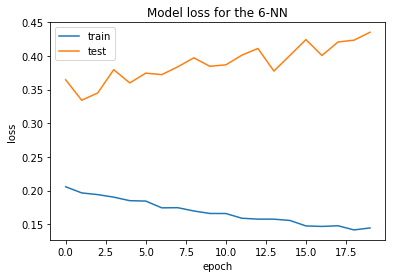

In [46]:
history=model_6.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print("Model - 6 layers - test loss:", test_loss * 100)
print("Model - 6 layers - test accuracy:", test_acc * 100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for the 6-NN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### Making predictions

In [48]:
# confidence of the model that the image corresponds to the label 
predictions = model_3.predict(test_images)
predictions.shape #(10000, 10)
predictions[0]

array([1.5748844e-22, 5.8855001e-22, 2.5561242e-22, 3.4946790e-34,
       1.0932116e-21, 1.8126721e-09, 4.3209545e-26, 1.1383211e-08,
       3.2869195e-19, 1.0000000e+00], dtype=float32)

In [49]:
np.argmax(predictions[0])

9

In [50]:
class_names[9]

'Ankle boot'

In [51]:
#Ankle boot has the highest confidence value 
test_labels[0]


9

In [52]:
# plot image in a grid
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
# plot the value array    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot= plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

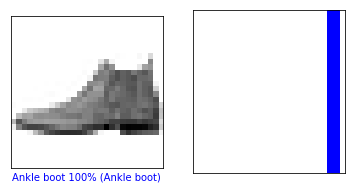

In [53]:
# look at 0th image, predictions, prediction array
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

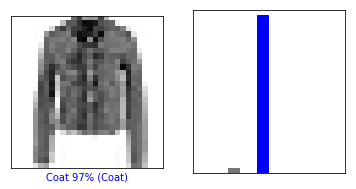

In [54]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

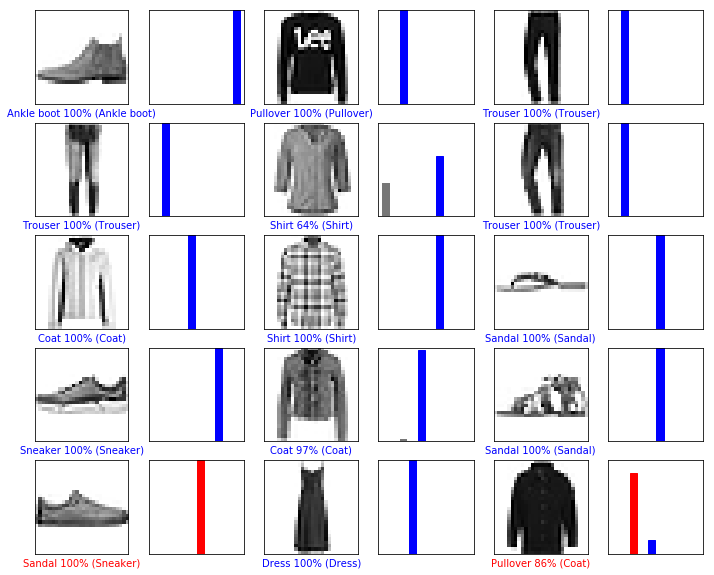

In [55]:
# Plot the first 15 test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [56]:
# apply the trained model to make prediction about a single image
# Grab an image from the test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [57]:
#tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [58]:
# Predict the image
predictions_single = model_3.predict(img)
# returns a list of lists
print(predictions_single)

[[1.5748605e-22 5.8854774e-22 2.5560754e-22 3.4946524e-34 1.0931949e-21
  1.8126479e-09 4.3209708e-26 1.1383233e-08 3.2868694e-19 1.0000000e+00]]


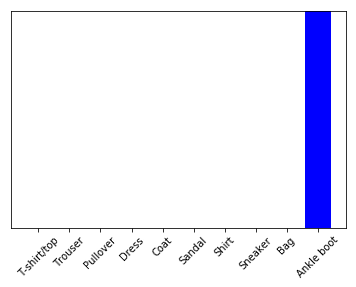

In [59]:
plot_value_array(0,predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [60]:
np.argmax(predictions_single[0])

9